# Network Plot for Bigrams

The code in this notebook was referenced from [this](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-bigrams/) article.

Network plots show interconnections between a set of entities. Each entity is represented by a Node. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns; sns.set()
%matplotlib inline
# packages for NLP preprocessing
import nltk
from sklearn.feature_extraction import text 
from nltk.stem import WordNetLemmatizer 
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.collocations import *
import pickle

In [2]:
processed_data = pickle.load(open('../pickle/processed_data.pkl', 'rb'))

In [3]:
from nltk import bigrams

# create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in processed_data]

In [4]:
terms_bigram[0]

[('woman', 'shouldnt'),
 ('shouldnt', 'complain'),
 ('complain', 'cleaning'),
 ('cleaning', 'house'),
 ('house', 'man'),
 ('man', 'always'),
 ('always', 'take'),
 ('take', 'trash')]

## Creating bigrams

In [5]:
import itertools
import collections

# flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

In [6]:
bigram_counts.most_common(20)

[(('wan', 'na'), 341),
 (('got', 'ta'), 309),
 (('gon', 'na'), 292),
 (('bitch', 'ass'), 237),
 (('like', 'bitch'), 212),
 (('look', 'like'), 202),
 (('yo', 'bitch'), 191),
 (('ass', 'bitch'), 189),
 (('bad', 'bitch'), 179),
 (('bitch', 'im'), 150),
 (('bad', 'bitches'), 142),
 (('bitch', 'dont'), 142),
 (('ass', 'nigga'), 131),
 (('hoes', 'aint'), 125),
 (('little', 'bitch'), 123),
 (('fuck', 'bitch'), 120),
 (('bitch', 'aint'), 109),
 (('dont', 'know'), 103),
 (('white', 'trash'), 101),
 (('bitch', 'got'), 99)]

In [7]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20), columns=['bigram', 'count'])
bigram_df

,bigram,count
0,"(wan, na)",341
1,"(got, ta)",309
2,"(gon, na)",292
3,"(bitch, ass)",237
4,"(like, bitch)",212
5,"(look, like)",202
6,"(yo, bitch)",191
7,"(ass, bitch)",189
8,"(bad, bitch)",179
9,"(bitch, im)",150


In [8]:
bigram_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   bigram  20 non-null     object
 1   count   20 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 448.0+ bytes


In [9]:
# bigram_df['bigram'] = bigram_df['bigram'].astype(str).str.replace('nigga','nxxga')
# bigram_df['bigram'] = bigram_df['bigram'].astype(str).str.replace('bitch','bxxch')

In [10]:
bigram_df.head()

,bigram,count
0,"(wan, na)",341
1,"(got, ta)",309
2,"(gon, na)",292
3,"(bitch, ass)",237
4,"(like, bitch)",212


## Visualize Networks of Bigrams

Now we can use this Dataframe to visualize the top 20 occurring bigrams as networks using the package `NetworkX`.

In [11]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

In [12]:
import networkx as nx

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

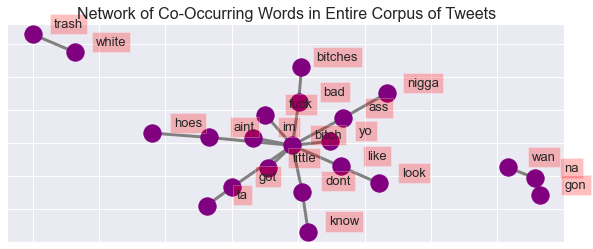

In [13]:
fig, ax = plt.subplots(figsize=(10, 4))

random_pos = nx.random_layout(G, seed=38)
pos = nx.spring_layout(G, k=3, pos=random_pos)
# pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=12,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.title('Network of Co-Occurring Words in Entire Corpus of Tweets', fontsize=16)

plt.savefig('../visualizations/uncensored_bigrams_network.png', bbox_inches = "tight", pad_inches=.5)
plt.show()

This plot displays the networks of co-occurring words in tweets with hate speech or offensive language